<a href="https://colab.research.google.com/github/carlocamilloni/Structural-Bioinformatics/blob/main/Notebooks/t07_StructurePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Protein Structure Prediction

In this notebook you will try to characterize one protein from its sequence using multiple tools. In particular we will work on proteins from the human papilloma virus (HPV). You will perform

1.   Secondary structure prediction
2.   Tertiary structure prediction

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
local_path='/content/drive/MyDrive/Structural_Bioinformatics/Task7'
%cd {local_path}

/content/drive/MyDrive/Structural_Bioinformatics/Task7


Now you can choose one among these sequences on which you will work. To choose it set the seq variable in the following:

*   P27962
*   P27963
*   P27964
*   P27965

You can learn more about these proteins checking them on www.uniprot.org


In [3]:
# XXX is the protein you choose
seq='P27962.fasta'

In [4]:
#get the sequence you choose as:
!wget https://www.uniprot.org/uniprot/{seq}

--2023-12-04 16:44:33--  https://www.uniprot.org/uniprot/P27962.fasta
Resolving www.uniprot.org (www.uniprot.org)... 193.62.193.81
Connecting to www.uniprot.org (www.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://rest.uniprot.org/uniprot/P27962.fasta [following]
--2023-12-04 16:44:34--  https://rest.uniprot.org/uniprot/P27962.fasta
Resolving rest.uniprot.org (rest.uniprot.org)... 193.62.193.81
Connecting to rest.uniprot.org (rest.uniprot.org)|193.62.193.81|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://rest.uniprot.org/uniprotkb/P27962.fasta [following]
--2023-12-04 16:44:34--  https://rest.uniprot.org/uniprotkb/P27962.fasta
Reusing existing connection to rest.uniprot.org:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘P27962.fasta’

P27962.fasta            [ <=>                ]     253  --.-KB/s    in 0s   

In [5]:
#Installing biopython using pip
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.9 MB/s eta 0:00:00


Biopython is an excellent companion for working with DNA and protein sequences and also with structures. Here, we will show how to use it for reading a protein sequence file.


In [6]:
import os
from pathlib import Path
from Bio import SeqIO, Entrez
# read your protein sequence
aaseq = SeqIO.read(seq, format="fasta")

What is great about SeqIO is that you can use it to manipulate your sequence (e.g. sorting, changing formats, etc) and also to print information about your sequence, such as its description, sequence and accession ID.
You can try these commands below by first writing "aaseq." and then selecting one of the autocomplete options suggested by Google Colab. With this information, try to obtain the information requested below.

In [7]:
#Printing the number of amino acids as an example
print("Sequence length (aa):")
print(len(aaseq))

Sequence length (aa):
158


In [8]:
#Printing the description of the sequence
print("The description of the sequence is:")
print(aaseq.description)

#Printing the accession ID of the sequence
print("The ID of the sequence is:")
print(aaseq.id)

#Printing the sequence
print("The sequence is:")
print(aaseq.seq)

The description of the sequence is:
sp|P27962|VE6_HPVME Protein E6 OS=Human papillomavirus type ME180 OX=10602 GN=E6 PE=3 SV=1
The ID of the sequence is:
sp|P27962|VE6_HPVME
The sequence is:
MALFHNPEERPYKLPDLCRTLDTTLHDVTIDCVYCRRQLQRTEVYEFAFGDLNVVYRDGVPLAACQSCIKFYAKIRELRYYSESVYATTLETITNTKLYDLSIRCMCCLKPLSPAEKLRHLNSKRRFHKIAGNFTGQCRHCWTSKREDRRRTRQETQV


## Secondary Structure Prediction

Now we can begin with a secondary structure prediction from the sequence. For this we will use S4PRED (https://github.com/psipred/s4pred)

In [9]:
%cd {local_path}

/content/drive/MyDrive/Structural_Bioinformatics/Task7


In [10]:
# we need to download and install s4pred
!git clone --depth 1 https://github.com/psipred/s4pred
%cd s4pred
!wget http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights.tar.gz
!tar -xvzf weights.tar.gz

Cloning into 's4pred'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 1), reused 9 (delta 1), pack-reused 0
Receiving objects: 100% (19/19), 50.63 KiB | 3.62 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/drive/MyDrive/Structural_Bioinformatics/Task7/s4pred
--2023-12-04 16:44:56--  http://bioinfadmin.cs.ucl.ac.uk/downloads/s4pred/weights.tar.gz
Resolving bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.ucl.ac.uk)... 128.16.10.201
Connecting to bioinfadmin.cs.ucl.ac.uk (bioinfadmin.cs.ucl.ac.uk)|128.16.10.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413507011 (394M) [application/x-gzip]
Saving to: ‘weights.tar.gz’

weights.tar.gz      100%[===================>] 394.35M  19.4MB/s    in 20s     

2023-12-04 16:45:17 (19.5 MB/s) - ‘weights.tar.gz’ saved [413507011/413507011]

weights/
weights/weights_1.pt
weights/weights_2.pt
weights/weights_3.

In [11]:
# Install: PyTorch
# this can be long...
!pip install torch==1.11.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu118
    Uninstalling torch-2.1.0+cu118:
      Successfully uninstalled torch-2.1.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu118 requires torch==2.1.0, but you have torch 1.11.0+cu102 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.11.0+cu102 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.11.0+cu102 which is incompatible.
torchvision 0.16.0+cu118 requires torch==2.1.0, but you have torch 1.11.0+cu102 which is incompatible.


Now we can run the prediction over our fasta sequence and save it in a text file. You can then double click on the file to see the results

In [12]:
%cd {local_path}
!python s4pred/run_model.py {seq} > ss.{seq}.txt
%ls ss.{seq}.txt

/content/drive/MyDrive/Structural_Bioinformatics/Task7
ss.P27962.fasta.txt


The file is made of three columns that report the secondary structure prediction and are COIL/HELIX/EXTENDED, we can now load and plot the results

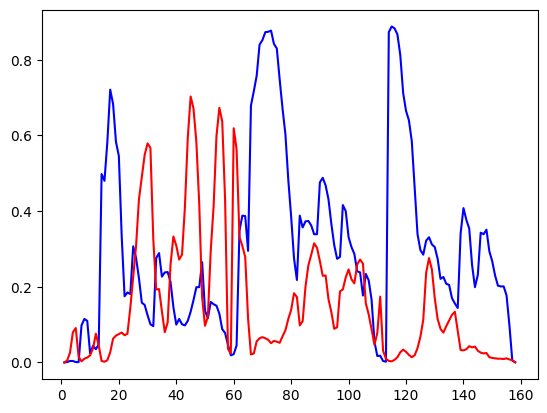

In [33]:
import pandas as pd
# here we are giving the titles to the columns of the file
header_list = ["position", "sequence", "ss", "coil", "helix","extended"]
# here we are reading the file skipping the first two lines
# you need to set your file name
data = pd.read_csv('ss.'+str(seq)+'.txt',sep='\s+',skiprows=2,names=header_list)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
#we are generating three plots calling each column with its name
#and setting the properties of the plot (e.g. the color of the line)
#plt.plot(data['position'], data['coil'], color='black')
plt.plot(data['position'], data['helix'], color='blue')
plt.plot(data['position'], data['extended'], color='red')
#show the plot now
plt.show()

you can check how to improve the plot looking for matplotlib plot example. This plot can be used to describe what the secondary structure of the protein can be

## Structure Prediction


Here you will try to predict your structure using alphafold. Prepare a folder to save your data. Open the google colab at this link
https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb
and save it locally before moving on



Depending on the length of your sequence alphafold can take around 30 minutes.

Once you have all the PDB structures you can compare them using VMD.